In [1]:
from dask.distributed import Client
client = Client(processes=False, threads_per_worker=8, n_workers=6, memory_limit='128GB')

# Using intake-esm on mistral
- install intake-esm: https://intake-esm.readthedocs.io/en/latest/installation.html
- check the already built catalogs: `/home/mpim/m300524/.intake_esm/collections` and copy to `/home/mpim/mxxxxxx/.intake_esm/collections` skip long catalog building process

This tutorial includes two approaches how to load MPI-GE data:
 - /work/mh1007/MPI-GE as MPI-ESM standard output streams: one year with many variables per file
 - cmorized output: one variable for the whole experiment per file

In [40]:
!ls -all /home/mpim/m300524/.intake_esm/collections/mpige

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
total 217788
drwxr-xr-x 2 m300524 mpioes      4096 Jun 21 10:33 .
drwxr-xr-x 5 m300524 mpioes      4096 Apr 26 10:14 ..
-rw-r--r-- 1 m300524 mpioes 223002475 May  3 19:29 mistral_mpi_ge.mpige.csv


In [3]:
import intake # make sure intake-esm is installed also
import xarray as xr
import numpy as np
import pandas as pd

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# MPI Grand Ensemble
## renamed output
hosted at /work/mh1007/MPI-GE

In [4]:
!ls /work/mh1007/MPI-GE

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
hist  onepct  pictrl  rcp26  rcp45  rcp85


In [42]:
!cat /home/mpim/m300524/pymistral/intake/collection_input_mpim_ge.yml | head -35

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
name: mistral_mpi_ge
collection_type: mpige
include_cache_dir: true
data_sources:
  pictrl:
    locations:
      - name: MISTRAL-DATA
        loc_type: posix
        direct_access: True
        urlpath: /work/mh1007/MPI-GE/pictrl
        exclude_dirs: ["*/restart/*", "*/log/*"]
    component_attrs:
      ocn:
        grid: GR15
    case_members:
      - case: pictrl0001
        sequence_order: 0
        ensemble: 1
      - case: pictrl0002
        sequence_order: 0
        ensemble: 2
  hist:
    locations:
      - name: MISTRAL-DATA
        loc_type: posix
        direct_access: True
        urlpath: /work/mh1007/MPI-GE/hist
        exclude_dirs: ["*/restart/*", "*/log/*"]
    component_attrs:
      ocn:
        grid: GR15
    case_members:
      - case: hist0001
        sequence_order: 0
        ensemble: 1


In [32]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/collection_input_mpim_ge.yml'
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [7]:
number_of_files_per_year = 1
for c in ['stream','component','ensemble','experiment']:
    u = col.df[c].unique()
    if c not in ['stream','experiment']:
        number_of_files_per_year = number_of_files_per_year * len(u)
    print(c,u,len(u))
print('number_of_files_per_year:',number_of_files_per_year)

stream ['timeser_mm' 'data_3d_mm' 'data_moc_mm' 'monitoring_ym' 'data_2d_mm'
 'data_3d_ym' 'data_sedi_ym' 'data_eu_mm' 'co2'] 9
component ['mpiom' 'hamocc'] 2
ensemble [100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1] 100
experiment ['onepct' 'rcp85' 'rcp45' 'rcp26' 'hist' 'pictrl'] 6
number_of_files_per_year: 200


In [33]:
col.df.head()

,resource,resource_type,direct_access,experiment,case,component,stream,date_range,ensemble,file_fullpath,file_basename,file_dirname,ctrl_branch_year,year_offset,sequence_order,grid
0,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,timeser_mm,18850101-18851231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_timeser_mm_18850101_18851231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
1,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,data_3d_mm,18770101-18771231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_data_3d_mm_18770101_18771231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
2,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,data_moc_mm,18800101-18801231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_data_moc_mm_18800101_18801231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
3,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,monitoring_ym,19960101-19961231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_monitoring_ym_19960101_199612...,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
4,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,data_3d_mm,19710101-19711231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_data_3d_mm_19710101_19711231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN


In [34]:
col.df['stream'].unique()

array(['timeser_mm', 'data_3d_mm', 'data_moc_mm', 'monitoring_ym',
       'data_2d_mm', 'data_3d_ym', 'data_sedi_ym', 'data_eu_mm', 'co2'],
      dtype=object)

# piControl

In [35]:
cat = col.search(component='mpiom', stream='data_2d_mm',experiment='pictrl',ensemble=1)

In [37]:
cat.query_results.head()

,resource,resource_type,direct_access,experiment,case,component,stream,date_range,ensemble,file_fullpath,file_basename,file_dirname,ctrl_branch_year,year_offset,sequence_order,grid
663875,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/pictrl,posix,True,pictrl,pictrl0001,mpiom,data_2d_mm,18500101-18501231,1,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,pictrl0001_mpiom_data_2d_mm_18500101_18501231.nc,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,NaN,NaN,0,NaN
667159,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/pictrl,posix,True,pictrl,pictrl0001,mpiom,data_2d_mm,18510101-18511231,1,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,pictrl0001_mpiom_data_2d_mm_18510101_18511231.nc,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,NaN,NaN,0,NaN
667748,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/pictrl,posix,True,pictrl,pictrl0001,mpiom,data_2d_mm,18520101-18521231,1,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,pictrl0001_mpiom_data_2d_mm_18520101_18521231.nc,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,NaN,NaN,0,NaN
668619,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/pictrl,posix,True,pictrl,pictrl0001,mpiom,data_2d_mm,18530101-18531231,1,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,pictrl0001_mpiom_data_2d_mm_18530101_18531231.nc,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,NaN,NaN,0,NaN
668723,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/pictrl,posix,True,pictrl,pictrl0001,mpiom,data_2d_mm,18540101-18541231,1,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,pictrl0001_mpiom_data_2d_mm_18540101_18541231.nc,/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/...,NaN,NaN,0,NaN


In [48]:
!cdo vardes /work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/mpiom/pictrl0001_mpiom_data_2d_mm_18500101_18501231.nc

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
   1  zo            Sea surface elevation [m]
  11  zo_sqr        Square of sea surface elevation [m2]
  12  sst           Sea surface temperature [K]
  13  sictho        Sea ice thickness [m]
  14  sst_sqr       Square of sea surface temperature [K2]
  15  sicomo        Sea ice area fraction [1]
  16  sss           Sea surface salinity [psu]
  17  bottom_pressure  Sea water pressure at sea floor [dbar]
  27  psitro        Ocean barotropic mass streamfunction [kg s-1]
  35  sicuo         Sea ice x velocity [m s-1]
  36  sicve         Sea ice y velocity [m s-1]
  70  flum          Surface net downward heat flux where sea [w m-2]
  79  pem           Water flux into ocean [m s-1]
 123  oxhtradv      Ocean heat x transport due to advection [W]
 124  oyhtradv      Ocean heat y transport due to advection [W]
 125  oxhtrdif      Ocean heat x transport due to diffus

In [52]:
def preprocess(ds,varnamelist=['sst'],drop_coords=None):
    new_ds = []
    for v in varnamelist:
        #print(v)
        if v in ds:
            n_ds = ds[v].squeeze()#.drop(drop_coords)            
            new_ds.append(n_ds)
    new_ds = xr.merge(new_ds)
    return new_ds

In [53]:
ds = cat_to_xarray(cat,preprocess=preprocess)

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [63]:
ds=ds[0].squeeze()

In [64]:
ds['time'] = xr.cftime_range(start='1850',periods=ds.time.size,freq='M')

In [67]:
ds_ym = ds.groupby('time.year').mean('time').rename({'year':'time'})

In [69]:
%time ds_ym.to_netcdf('/work/mh0727/m300524/160701_Grand_Ensemble/postprocessed/picontrol_sst_ym.nc')

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 5min 24s, sys: 2min 31s, total: 7min 56s
Wall time: 10min 24s


In [70]:
%time ds.to_netcdf('/work/mh0727/m300524/160701_Grand_Ensemble/postprocessed/picontrol_sst_mm.nc')

CPU times: user 5min 21s, sys: 2min 27s, total: 7min 49s
Wall time: 14min 44s


## monitoring example

In [75]:
cat = col.search(component=['mpiom','hamocc'], stream='monitoring_ym',experiment=['hist'],ensemble=[1,3])

In [78]:
def preprocess(ds,varnamelist=['gmsl_st','global_surface_alkalinity'],drop_coords=['lon','lat','depth']):
    new_ds = []
    for v in varnamelist:
        #print(v)
        if v in ds:
            n_ds = ds[v].squeeze().drop(drop_coords)            
            new_ds.append(n_ds)
    new_ds = xr.merge(new_ds)
    return new_ds

In [40]:
def cat_to_xarray(cat,preprocess=None,merge=False,concat=False):
    grouped = cat.query_results.groupby(['experiment'])
    ds = xr.Dataset()
    all_dsets = []
    for dset_keys, dset_files in grouped:
        dset_id = dset_keys
        exp_dsets = []
        for comp_id, comp_files in dset_files.groupby('component'):
            member_ids = []
            member_dsets = []
            for m_id, m_files in comp_files.groupby('ensemble'):
                files = m_files['file_fullpath']
                #print(m_id,comp_id,files[0],files[0])
                if preprocess is not None:
                    ds = xr.open_mfdataset(files,preprocess=preprocess,concat_dim='time')
                else:
                    ds = xr.open_mfdataset(files)
                member_dsets.append(ds)
                member_ids.append(m_id)

            _ds = xr.concat(member_dsets, 'member')
            _ds['member'] = member_ids
            exp_dsets.append(_ds)
        all_dsets.append(xr.merge(exp_dsets))
    if merge:
        return xr.merge(all_dsets)
    elif concat:
        all_dsets = xr.concat(all_dsets,'ext')
        #all_dsets['ext']=grou
        return all_dsets
    else:
        return all_dsets

In [39]:
varnamelist=['global_OM_export_at_90m','global_net_co2_flux']
def preprocess(ds,varnamelist=varnamelist,drop_coords=['lon','lat','depth']):
    new_ds = []
    for v in varnamelist:
        if v in ds:
            n_ds = ds[v].squeeze().drop(drop_coords)            
            new_ds.append(n_ds)
    new_ds = xr.merge(new_ds)
    return new_ds

In [81]:
%time all_dsets = cat_to_xarray(cat,preprocess=preprocess,merge=True)

CPU times: user 20.7 s, sys: 2.82 s, total: 23.5 s
Wall time: 34.3 s


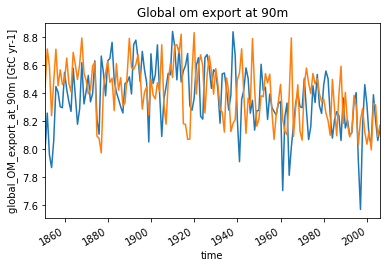

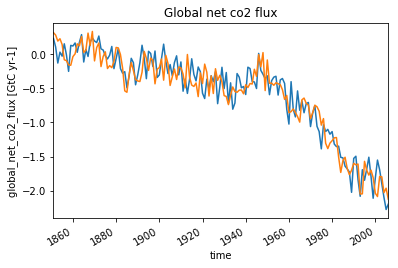

In [82]:
import matplotlib.pyplot as plt
for v in varnamelist:
    d=all_dsets[v]#.isel(time=slice(0,2))
    longname=d.attrs['long_name']
    unit='['+d.attrs['units']+']'
    ylabel=' '.join([v,unit])
    d.to_dataframe().unstack(0)[v].plot(legend=False,title=longname)
    plt.ylabel(ylabel)
    plt.show()

## data_2d_mm example

In [84]:
cat = col.search(component=['mpiom'], stream='data_2d_mm',experiment=['hist'],ensemble=[1,2])

In [85]:
%time ds = cat.to_xarray()


CPU times: user 1min 23s, sys: 19.2 s, total: 1min 42s
Wall time: 3min 7s


In [87]:
ds

<xarray.Dataset>
Dimensions:          (depth: 1, depth_2: 1, depth_3: 1, member_id: 2, time: 1872, x: 256, x_2: 256, x_3: 256, x_4: 256, y: 220, y_2: 220, y_3: 220, y_4: 220)
Coordinates:
    lon              (y, x) float64 -47.25 -47.69 -48.12 ... 131.3 132.5 133.8
    lat              (y, x) float64 76.36 76.3 76.24 ... -77.25 -77.39 -77.54
    lon_2            (y_2, x_2) float64 -47.36 -47.78 -48.2 ... 133.5 133.5
    lat_2            (y_2, x_2) float64 76.28 76.22 76.16 ... -77.33 -77.33
    lon_3            (y_3, x_3) float64 -47.48 -47.91 -48.34 ... 133.2 134.4
    lat_3            (y_3, x_3) float64 76.33 76.27 76.21 ... -77.47 -77.61
    lon_4            (y_4, x_4) float64 -47.37 -47.82 -48.26 ... 132.5 133.8
    lat_4            (y_4, x_4) float64 76.41 76.35 76.29 ... -77.39 -77.54
  * depth            (depth) float64 0.0
  * depth_2          (depth_2) float64 0.0
  * depth_3          (depth_3) float64 6.0
  * time             (time) datetime64[ns] 1850-01-31T23:15:00 ... 200

In [88]:
ds.nbytes/1e9

36.271897256

In [92]:
v='sst'
%time t=ds[v].squeeze().groupby('time.year').mean('time').rename({'year':'time'}).isel(time=[1,2,3,-3,-2,-1]).std('member_id').compute()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/reductions.py:408: RuntimeWarning: invalid value encountered in true_divide
  u = total / n


CPU times: user 1.18 s, sys: 822 ms, total: 2 s
Wall time: 2.79 s


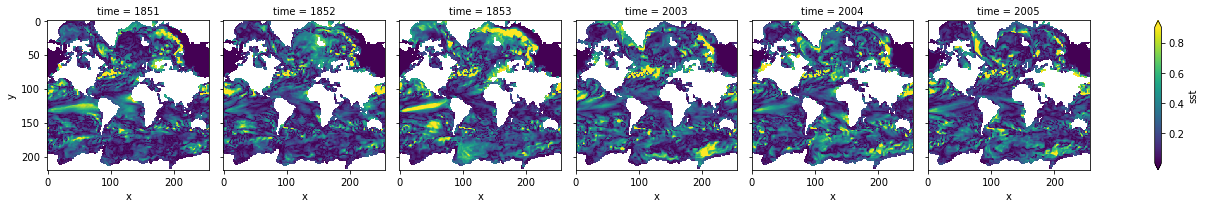

In [94]:
t.plot(robust=True,col='time',yincrease=False)

## data_3d_ym example

In [95]:
cat = col.search(component=['hamocc'], stream='data_3d_ym',experiment='hist',ensemble=[1,3])

In [96]:
%time ds = cat.to_xarray()


CPU times: user 27.7 s, sys: 6.39 s, total: 34.1 s
Wall time: 49.9 s


In [97]:
ds.nbytes/1e9

53.419296304

In [98]:
v='oxygen'
%time t=ds.isel(depth=14)[v].isel(time=[1,2,3,-3,-2,-1]).std('member_id').compute()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/reductions.py:408: RuntimeWarning: invalid value encountered in true_divide
  u = total / n
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 713 ms, sys: 673 ms, total: 1.39 s
Wall time: 1.55 s


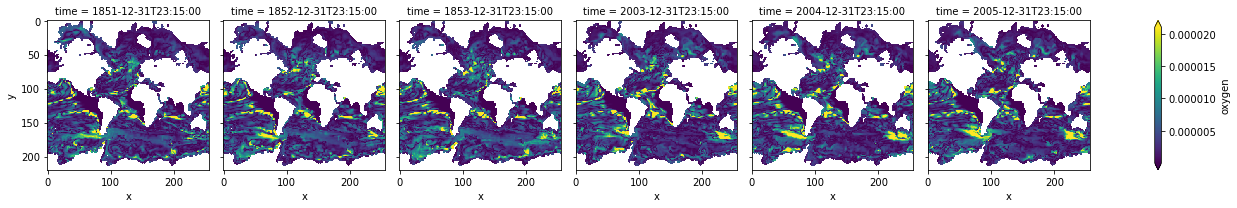

In [99]:
t.plot(robust=True,col='time',yincrease=False)

## example combining RCPs

In [100]:
def cat_to_xarray(cat,preprocess=None,merge=True,concat_ext=False,concat_time=False):
    grouped = cat.query_results.groupby(['experiment'])
    ds = xr.Dataset()
    all_dsets = []
    for dset_keys, dset_files in grouped:
        dset_id = dset_keys
        exp_dsets = []
        for comp_id, comp_files in dset_files.groupby('component'):
            member_ids = []
            member_dsets = []
            for m_id, m_files in comp_files.groupby('ensemble'):
                files = m_files['file_fullpath']
                if preprocess is not None:
                    ds = xr.open_mfdataset(files,preprocess=preprocess,concat_dim='time')
                else:
                    ds = xr.open_mfdataset(files)
                member_dsets.append(ds)
                member_ids.append(m_id)

            _ds = xr.concat(member_dsets, 'member')
            _ds['member'] = member_ids
            exp_dsets.append(_ds)
        all_dsets.append(xr.merge(exp_dsets))
    # comments to explain lazy behaviour
    if merge:
        return xr.merge(all_dsets) # when only streams are different
    elif concat_ext: # when experiments = ['rcp26','rcp45','rcp85']
        all_dsets = xr.concat(all_dsets,'ext')
        return all_dsets
    elif concat_time: # when experiments = ['hist','rcpxx']
        all_dsets = xr.concat(all_dsets,'time')
        return all_dsets
    else:
        return all_dsets

In [103]:
cat = col.search(component='hamocc', stream='monitoring_ym',experiment=['rcp26','rcp45'],ensemble=list(np.arange(1,3)))

In [111]:
varnamelist=['global_OM_export_at_90m','global_net_co2_flux']
drop_dims = ['lon','lat','depth']
def preprocess(ds,varnamelist=varnamelist,drop_coords=drop_dims):
    new_ds = []
    if varnamelist is None: # get all
        return ds.squeeze().drop(drop_coords)
    elif len(varnamelist) is 1:
        return ds[varnamelist[0]].squeeze().drop(drop_coords).to_dataset()
    else:
        for v in varnamelist:
            if v in ds:
                n_ds = ds[v].squeeze().drop(drop_coords)            
                new_ds.append(n_ds)
    new_ds = xr.merge(new_ds)
    return new_ds

In [112]:
%time ds = cat_to_xarray(cat,preprocess=preprocess,concat_ext=True,merge=False)

CPU times: user 10.3 s, sys: 537 ms, total: 10.8 s
Wall time: 10.3 s


In [113]:
ds

<xarray.Dataset>
Dimensions:                  (ext: 2, member: 2, time: 94)
Coordinates:
  * time                     (time) datetime64[ns] 2006-12-31T23:15:00 ... 2099-12-31T23:15:00
  * member                   (member) int64 1 2
Dimensions without coordinates: ext
Data variables:
    global_OM_export_at_90m  (ext, member, time) float32 dask.array<shape=(2, 2, 94), chunksize=(1, 1, 1)>
    global_net_co2_flux      (ext, member, time) float32 dask.array<shape=(2, 2, 94), chunksize=(1, 1, 1)>

# cmorized MPI-GE
- check the already built catalogs: `/home/mpim/m300524/.intake_esm/collections` and copy to `/home/mpim/mxxxxxx/.intake_esm/collections` skip long catalog building process

In [39]:
!ls -all /home/mpim/m300524/.intake_esm/collections/cmip5/mpige*

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
-rw-r--r-- 1 m300524 mpioes 21587757 Apr 26 14:24 /home/mpim/m300524/.intake_esm/collections/cmip5/mpige_cmorized_mistral.cmip5.csv


In [4]:
!cat /home/mpim/m300524/pymistral/intake/mpige_cmorized_mistral.yml | head

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
name: mpige_cmorized_mistral
collection_type: cmip5
data_sources:
  root_dir:
    name: MISTRAL
    loc_type: posix
    direct_access: True
    urlpath: /work/mh1007/CMOR/MPI-GE


In [43]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/mpige_cmorized_mistral.yml'
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [44]:
col.df.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
0,CMIP5,r006i2005p3,rcp85,prw_Amon_MPI-ESM_rcp85_r006i2005p3_200601-2099...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Amon,MPI-ESM,atmos,output1,200601-209912,prw,v20190123
1,CMIP5,r032i2005p3,rcp45,baresoilFrac_Lmon_MPI-ESM_rcp45_r032i2005p3_20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,baresoilFrac,v20190123
2,CMIP5,r083i2005p3,rcp45,baresoilFrac_Lmon_MPI-ESM_rcp45_r083i2005p3_20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,baresoilFrac,v20190123
3,CMIP5,r018i2005p3,rcp45,baresoilFrac_Lmon_MPI-ESM_rcp45_r018i2005p3_20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,baresoilFrac,v20190123
4,CMIP5,r024i2005p3,rcp45,baresoilFrac_Lmon_MPI-ESM_rcp45_r024i2005p3_20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,baresoilFrac,v20190123


In [45]:
for v in ['experiment','ensemble_member','institute','model','product','variable']:
    print(v,col.df[v].unique(),'\n')

experiment ['rcp85' 'rcp45' '1pctCO2' 'rcp26' 'historical'] 

ensemble_member ['r006i2005p3' 'r032i2005p3' 'r083i2005p3' 'r018i2005p3' 'r024i2005p3'
 'r015i2005p3' 'r002i2005p3' 'r086i2005p3' 'r001i2005p3' 'r046i2005p3'
 'r097i2005p3' 'r007i2005p3' 'r060i2005p3' 'r029i2005p3' 'r093i2005p3'
 'r058i2005p3' 'r004i2005p3' 'r048i2005p3' 'r039i2005p3' 'r080i2005p3'
 'r052i2005p3' 'r037i2005p3' 'r020i2005p3' 'r013i2005p3' 'r019i2005p3'
 'r068i2005p3' 'r079i2005p3' 'r030i2005p3' 'r042i2005p3' 'r095i2005p3'
 'r009i2005p3' 'r063i2005p3' 'r057i2005p3' 'r051i2005p3' 'r094i2005p3'
 'r081i2005p3' 'r043i2005p3' 'r067i2005p3' 'r099i2005p3' 'r072i2005p3'
 'r070i2005p3' 'r045i2005p3' 'r069i2005p3' 'r017i2005p3' 'r064i2005p3'
 'r031i2005p3' 'r056i2005p3' 'r016i2005p3' 'r082i2005p3' 'r074i2005p3'
 'r059i2005p3' 'r005i2005p3' 'r096i2005p3' 'r098i2005p3' 'r076i2005p3'
 'r047i2005p3' 'r044i2005p3' 'r087i2005p3' 'r100i2005p3' 'r011i2005p3'
 'r078i2005p3' 'r090i2005p3' 'r062i2005p3' 'r028i2005p3' 'r066i2005p3'

In [49]:
v='cSoil'
cat = col.search(variable=v,experiment=['rcp26','rcp45','rcp85'])

In [50]:
cat.query_results.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
24854,CMIP5,r001i2005p3,rcp26,cSoil_Lmon_MPI-ESM_rcp26_r001i2005p3_200601-20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,cSoil,v20190123
24852,CMIP5,r002i2005p3,rcp26,cSoil_Lmon_MPI-ESM_rcp26_r002i2005p3_200601-20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,cSoil,v20190123
24814,CMIP5,r003i2005p3,rcp26,cSoil_Lmon_MPI-ESM_rcp26_r003i2005p3_200601-20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,cSoil,v20190123
24525,CMIP5,r004i2005p3,rcp26,cSoil_Lmon_MPI-ESM_rcp26_r004i2005p3_200601-20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,cSoil,v20190123
24503,CMIP5,r005i2005p3,rcp26,cSoil_Lmon_MPI-ESM_rcp26_r005i2005p3_200601-20...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,mon,MPI-M,Lmon,MPI-ESM,land,output1,200601-209912,cSoil,v20190123


In [53]:
'files to load',cat.query_results.index.size

('files to load', 300)

In [12]:
ds = cat.to_xarray()

In [13]:
DS = xr.concat([ds[k] for k in list(ds.keys())],'member')

In [ ]:
'lazy data:',DS.nbytes/1e9,'GB'

In [14]:
DS['time']=pd.date_range(start='2006',periods=DS.time.size,freq='M')

## calc predictive skill with climpred

In [15]:
DS['member_id']=np.arange(1,1+DS.member_id.size)

In [16]:
DS['member']=np.arange(1,1+DS.member.size)

In [17]:
DS=DS.rename({'member_id':'init','time':'lead'})

In [18]:
DS.nbytes/1e9,'GB'

24.949567352

In [19]:
DS=DS.isel(lead=slice(None,5*12))

In [20]:
DS=DS.groupby('lead.year').mean('lead').rename({'year':'lead'})

In [21]:
DS=DS.compute()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [22]:
DS

<xarray.Dataset>
Dimensions:  (init: 100, lat: 96, lead: 5, lon: 192, member: 3)
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * init     (init) int64 1 2 3 4 5 6 7 8 9 10 ... 92 93 94 95 96 97 98 99 100
  * member   (member) int64 1 2 3
  * lead     (lead) int64 2006 2007 2008 2009 2010
Data variables:
    cSoil    (lead, member, init, lat, lon) float32 0.0 0.0 0.0 ... nan nan nan

In [23]:
from climpred.prediction import compute_perfect_model

In [34]:
# http://climpred.readthedocs.io/
%time skill = compute_perfect_model(DS,DS, metric='rmse',comparison='m2e')

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 660 ms, sys: 455 ms, total: 1.11 s
Wall time: 1.01 s


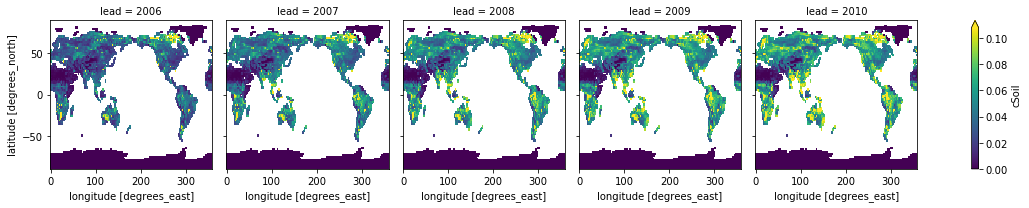

In [35]:
skill[v].plot(col='lead',robust=True)

# create yaml file

In [8]:
base='name: mistral_mpi_ge'
base2='collection_type: mpige'
base3='include_cache_dir: true'
base4='data_sources:'

In [9]:
base_dir='/work/mh1007/MPI-GE/'

In [10]:
import pandas as pd
branchtime=pd.read_csv('/home/mpim/m300524/PhD_Thesis/PhD_scripts/160701_Grand_Ensemble/branchtime.txt',header=None, sep=':')

In [11]:
branchtime.loc[1][1]

1946

In [12]:
sequence_order=dict()
sequence_order['hist']=0
sequence_order['rcp26']=1
sequence_order['rcp45']=1
sequence_order['rcp85']=1
sequence_order['pictrl']=0
sequence_order['onepct']=0

In [13]:
max_member=100
expl=['pictrl','hist','rcp26','rcp45','rcp85','onepct']
with open('collection_input_mpim_ge.yml', 'w') as the_file:
    the_file.write(base+'\n')
    the_file.write(base2+'\n')
    the_file.write(base3+'\n')
    the_file.write(base4+'\n')
    for exp in expl:
        the_file.write('  '+exp+':\n')
        the_file.write('    locations:\n')
        the_file.write('      - name: MISTRAL-DATA\n')
        the_file.write('        loc_type: posix\n')
        the_file.write('        direct_access: True\n')
        the_file.write('        urlpath: '+base_dir+exp+'\n')
        if exp.startswith('r'):
            the_file.write('        exclude_dirs: ["*/restart/*", "*/log/*","*/output/mpiom/*mpiom_map.nc", "*/output/mpiom/*_mpiom_fx.nc"]\n')
        else:
            the_file.write('        exclude_dirs: ["*/restart/*", "*/log/*"]\n')
        the_file.write('    component_attrs:\n')
        the_file.write('      ocn:\n')
        the_file.write('        grid: GR15\n')
        the_file.write('    case_members:\n')
        for m in range(1,max_member+1):
            if exp is 'pictrl':
                if m not in [1,2]:
                    continue
            the_file.write('      - case: '+exp+str(m).zfill(4)+'\n')
            the_file.write('        sequence_order: '+str(sequence_order[exp])+'\n')
            the_file.write('        ensemble: '+str(m)+'\n')
            if exp not in ['pictrl','onepct']:
                the_file.write('        ctrl_branch_year: '+str(branchtime.loc[m-1][1])+'\n')

In [14]:
!cp collection_input_mpim_ge.yml ../../intake/.

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'


In [15]:
!cat collection_input_mpim_ge.yml

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
name: mistral_mpi_ge
collection_type: mpige
include_cache_dir: true
data_sources:
  pictrl:
    locations:
      - name: MISTRAL-DATA
        loc_type: posix
        direct_access: True
        urlpath: /work/mh1007/MPI-GE/pictrl
        exclude_dirs: ["*/restart/*", "*/log/*"]
    component_attrs:
      ocn:
        grid: GR15
    case_members:
      - case: pictrl0001
        sequence_order: 0
        ensemble: 1
      - case: pictrl0002
        sequence_order: 0
        ensemble: 2
  hist:
    locations:
      - name: MISTRAL-DATA
        loc_type: posix
        direct_access: True
        urlpath: /work/mh1007/MPI-GE/hist
        exclude_dirs: ["*/restart/*", "*/log/*"]
    component_attrs:
      ocn:
        grid: GR15
    case_members:
      - case: hist0001
        sequence_order: 0
        ensemble: 1
        ctrl_branch_year: 1898
      - case: hist